# 1. Cross-Validation

- In this notebook, we'll optimize hyperparameters with various CV schemes.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.model_selection import (
    KFold,
    RepeatedKFold,
    LeaveOneOut,
    LeavePOut,
    StratifiedKFold,
    GridSearchCV,
    train_test_split,
)

In [2]:
X, y = load_breast_cancer(as_frame=True, return_X_y=True)
y = pd.Series(y).map({0:1, 1:0})


# percentage of benign(0) and malignant(1)

y.value_counts(normalize=True)

target
0    0.627417
1    0.372583
Name: proportion, dtype: float64

In [3]:
# splitting the dataset into a train and test set

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=13)

display(X_train.shape)
display(X_test.shape)

(398, 30)

(171, 30)

# 2. K-Fold Cross-Validation

In [4]:
logit = LogisticRegression(
    penalty='l2', C=1, solver='liblinear', random_state=11, max_iter=10_000)

param_grid = dict(
    penalty=['l1', 'l2'],
    C=[10**i for i in range(-3, 2)])

kf = KFold(n_splits=5, shuffle=True, random_state=111)

clf = GridSearchCV(
    logit,
    param_grid,
    scoring='accuracy',
    cv=kf,
    refit=True)

search = clf.fit(X_train, y_train)

search.best_params_

{'C': 10, 'penalty': 'l2'}

In [5]:
results = pd.DataFrame(search.cv_results_)[['params', 'mean_test_score', 'std_test_score']]

print(results.shape)
results

(10, 3)


,params,mean_test_score,std_test_score
0,"{'C': 0.001, 'penalty': 'l1'}",0.912215,0.035110
1,"{'C': 0.001, 'penalty': 'l2'}",0.919747,0.031975
2,"{'C': 0.01, 'penalty': 'l1'}",0.917215,0.029968
3,"{'C': 0.01, 'penalty': 'l2'}",0.924747,0.034277
4,"{'C': 0.1, 'penalty': 'l1'}",0.924747,0.034277
5,"{'C': 0.1, 'penalty': 'l2'}",0.929778,0.029018
6,"{'C': 1, 'penalty': 'l1'}",0.944842,0.024415
7,"{'C': 1, 'penalty': 'l2'}",0.944810,0.016808
8,"{'C': 10, 'penalty': 'l1'}",0.947342,0.021434
9,"{'C': 10, 'penalty': 'l2'}",0.949842,0.020861


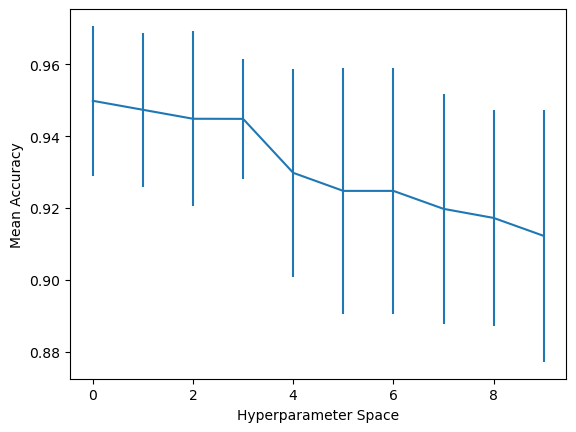

In [7]:
results.sort_values(by='mean_test_score', ascending=False, inplace=True)
results.reset_index(drop=True, inplace=True)

results['mean_test_score'].plot(yerr=[results['std_test_score'], results['std_test_score']], subplots=True)

plt.ylabel('Mean Accuracy')
plt.xlabel('Hyperparameter Space')

plt.show()

In [8]:
train_preds = search.predict(X_train)
test_preds = search.predict(X_test)

print('Train accuracy:', accuracy_score(y_train, train_preds))
print('Test accuracy:', accuracy_score(y_test, test_preds))

Train accuracy: 0.9623115577889447
Test accuracy: 0.9532163742690059


In [9]:
# for other cv schemes we'll do the same...